# NST Part II Physics - Computational Exercises<br />Exercise 3: Diffraction by FFT
The simulation class `FFTDiffractor` is responsible for most of the logic. We use units
of $a = kx$ and $b = y/D$ for the far-field diffraction where $k$ is the wavenumber and $D$ is
the distance to the screen. The near-field diffraction also requires another parameter
$c=kD$ which is effectively a measure of the screen distance in units of wavelength. 
The far-field diffraction pattern is simply the FFT of the input aperture array:
    $$\psi(b) = \int A(a) e^{iab} \, \text{d}a.$$
The near-field diffraction pattern is the FFT of the effective aperture function $A'(a)$,
$$\psi(b) = \int A'(a) e^{iab} \, \text{d}a.$$
$$A'(a) = e^{a^2/2c} A(a),$$ where $A(a)$ is the aperture array.

In [ ]:
%config InlineBackend.figure_format = 'retina'

import numpy as np

class FFTDiffractor:
    """
    Calculates diffracion pattern by FFT. Uses units of a=kx and b=y/D and c=kD.

    Constructor takes aperture_arr and an aperture_size where the aperture_size 
    is in units of a=kx. The calculate_far_field and calculate_near_field methods
    output a tuple of positions in units of b=y/D and corresponding amplitudes.
    """

    def __init__(self, aperture_arr, aperture_size):
        self.aperture_arr = aperture_arr
        self.aperture_size = aperture_size

    def calculate_far_field(self):
        bs = np.fft.fftfreq(len(self.aperture_arr), self.aperture_size/len(self.aperture_arr))
        psis = np.fft.fft(self.aperture_arr)

        bs = np.fft.fftshift(bs)
        psis = np.fft.fftshift(psis)

        return bs, psis

    def calculate_near_field(self, c):
        aas = np.linspace(-self.aperture_size/2, self.aperture_size/2, len(self.aperture_arr))
        eff_aperture = self.aperture_arr * np.exp(1j * aas**2 / 2 / c)

        bs = np.fft.fftfreq(len(self.aperture_arr), self.aperture_size/len(self.aperture_arr))
        psis = np.fft.fft(eff_aperture)

        bs = np.fft.fftshift(bs)
        psis = np.fft.fftshift(psis)

        return bs, psis

## Core Task 1<br />Single Slit Diffraction in the Far-Field
## Core Task 3<br />Single Slit Diffraction in the Near-Field

We run it on a single slit diffraction pattern with $d$ = 100µm, $\lambda$ = 500nm and 
$D$ = 1.0m. In our units this corresponds to a slit of width $a = 400\pi$. The Fraunhofer 
diffraction pattern is shown in Figure 1. We then add in our quadratic 
phase corrections and calculate the far-field pattern again at $D$ = 1.0m and the
near-field pattern at $D$ = 5mm. In our units this corresponds to $c = 20 \, 000\pi$ and
$c = 4\pi \times 10^6$. The far-field diffraction pattern looks the same as without the 
quadratic phase corrections and the near-field pattern looks like a Fresnel pattern.
These are shown in Figure 3 and Figure 2 respectively.

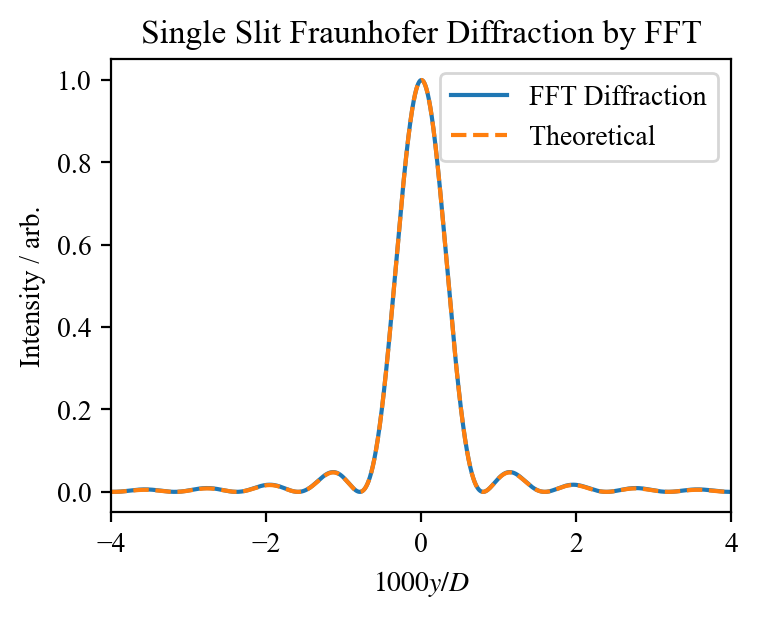

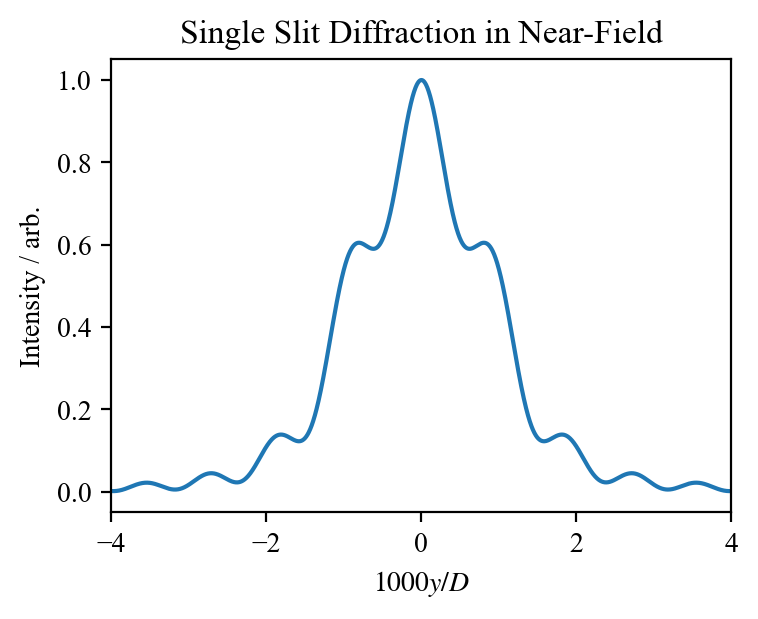

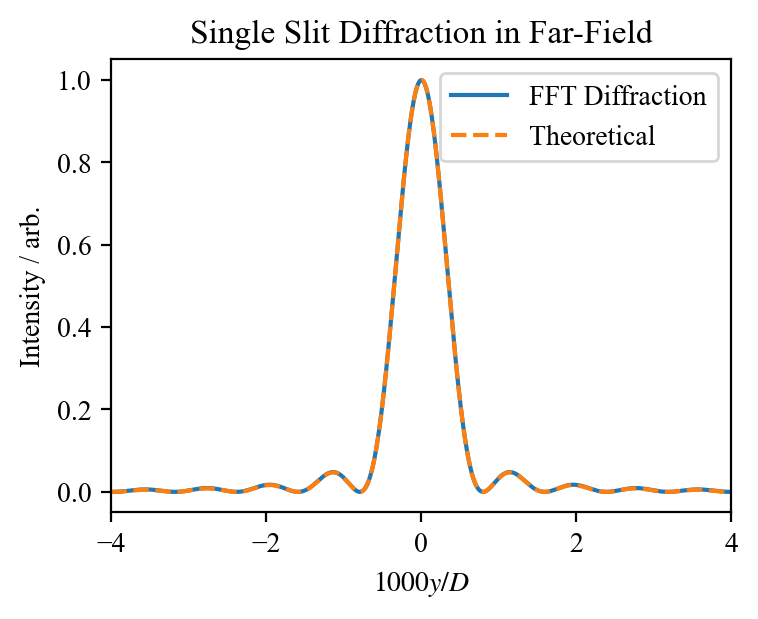

In [ ]:
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['figure.dpi'] = 100

# Calculate the diffraction pattern from a single slit width d with
# d = 100µm, \lambda = 500nm, D = 1.0m.
# In our units a = 400π.
steps = 5000
a_size = 100000*np.pi
aas = np.linspace(-a_size/2, a_size/2, steps)
aperture = (np.abs(aas) <= 200*np.pi).astype(np.float)

diffractor = FFTDiffractor(aperture, a_size)
bs, psis = diffractor.calculate_far_field()

intensity = np.abs(psis)**2
intensity = intensity / np.max(intensity)

theoretical = np.sinc(400*np.pi*bs)**2

plt.figure(1, figsize=(4,3))
plt.plot(1000*bs, intensity, label='FFT Diffraction')
plt.plot(1000*bs, theoretical, '--', label='Theoretical')
plt.xlabel('$1000y/D$')
plt.xlim([-4,4])
plt.ylabel('Intensity / arb.')
plt.title('Single Slit Fraunhofer Diffraction by FFT')
plt.legend()

# Calculate the near-field diffraction pattern from a single slit width d with
# d = 100µm, \lambda = 500nm, D = 1.0m.
# In our units a = 400π.
# Use distances D = 5mm for near-field and D = 1.0m for far-field.
# In our units c = 20 000π and c = 4π × 10^6

# Near field
bs2, psi2 = diffractor.calculate_near_field(20000*np.pi)
intensity2 = np.abs(psi2)**2
intensity2 = intensity2 / np.max(intensity2)

plt.figure(2, figsize=(4,3))
plt.plot(1000*bs2, intensity2, label='FFT Diffraction')
plt.xlabel('$1000y/D$')
plt.xlim([-4,4])
plt.ylabel('Intensity / arb.')
plt.title('Single Slit Diffraction in Near-Field')

# Far field
bs3, psi3 = diffractor.calculate_near_field(1e6*4*np.pi)
intensity3 = np.abs(psi3)**2
intensity3 = intensity3 / np.max(intensity3)

plt.figure(3, figsize=(4,3))
plt.plot(1000*bs3, intensity3, label='FFT Diffraction')
plt.plot(1000*bs3, theoretical, '--', label='Theoretical')
plt.xlabel('$1000y/D$')
plt.xlim([-4,4])
plt.ylabel('Intensity / arb.')
plt.title('Single Slit Diffraction in Far-Field')
plt.legend()

plt.show()

## Core Task 2<br />Sinusoidal Phase Grating in the Far-Field
## Core Task 3<br />Sinusoidal Phase Grating in the Near-Field

We now use this to calculate the diffraction pattern from a sinusoidal phase grating.
The result for Fraunhofer diffraction is shown in Figure 1. We see a bunch
of peaks with peaks separated by $0.8$ units in units of $1000 y/D$. This is as expected since our
aperture is periodic when $a \mapsto a + 400\pi$, so we expect the Fourier transform to be periodic
when $b \mapsto b + 1/400\pi$ which corresponds to roughly $0.8$ in units of $1000b$. Since our phase
amplitude is quite small, the phase is wrapped around multiple times in each oscillation
so the first peak is quite small and the higher order peaks are larger. We next add in
the quadratic phase factor for the far-field. A distance $D$ = 10m corresponding to 
$c = 4\pi \times 10^6$. This is plotted in Figure 5. The result is similar to
the Fraunhofer pattern meaning at this distance the quadratic phase terms are negligable.

The near-field diffraction pattern is significantly more complicated. We calculate the near
field pattern at $D$ = 0.5m corresponding to $c = 2000\pi$. There are three figures progressively
more zoomed in in Figure 2, Figure 3 and Figure 4. We notice that on a large scale the diffraction pattern is
similar to that of a normal Fresnel single-slit diffraction pattern. However if we zoom in
we see small oscillations corresponding to the effects of the sinusoidal phase grating.

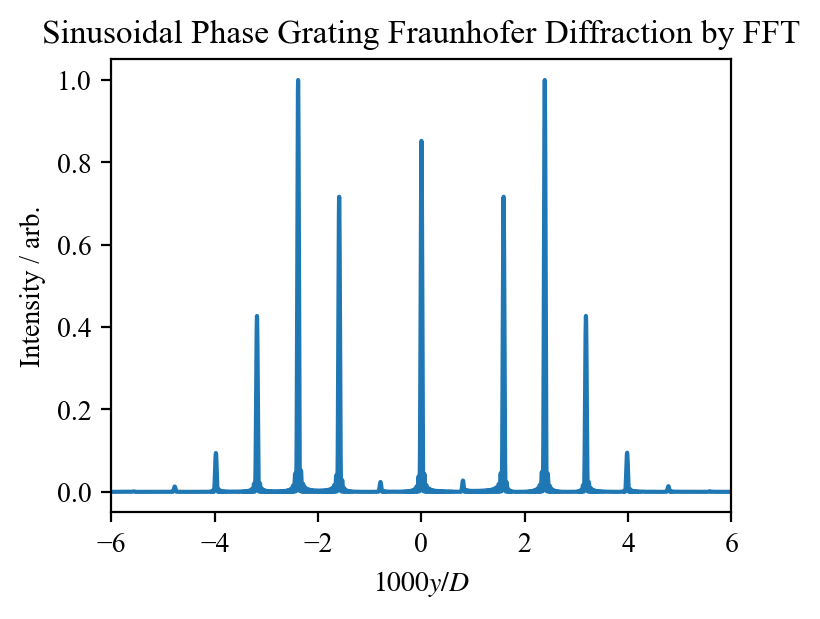

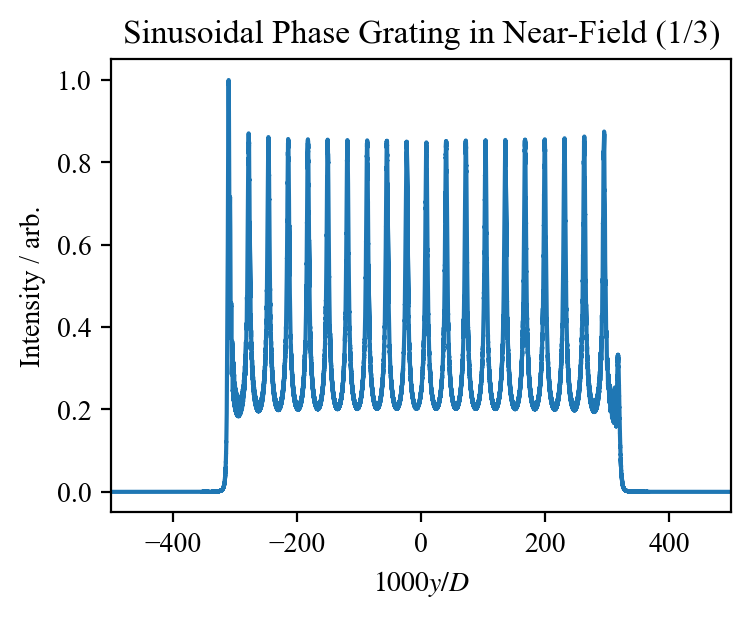

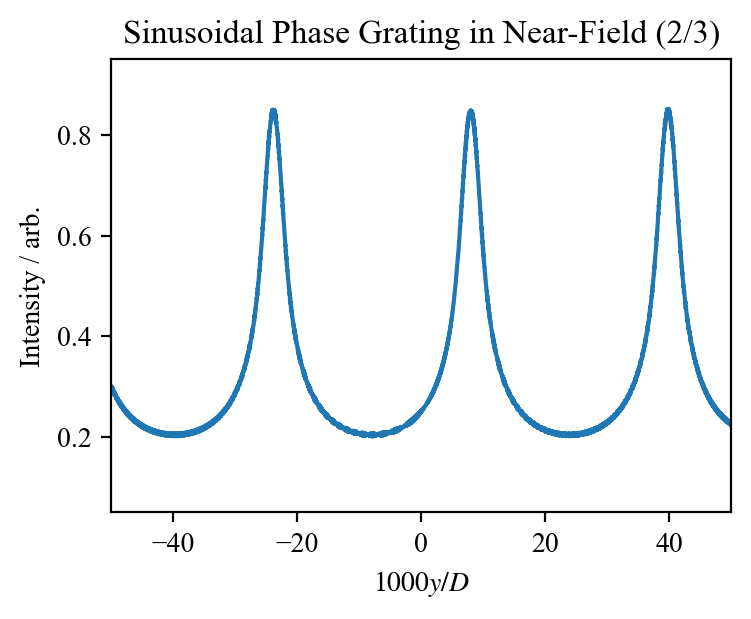

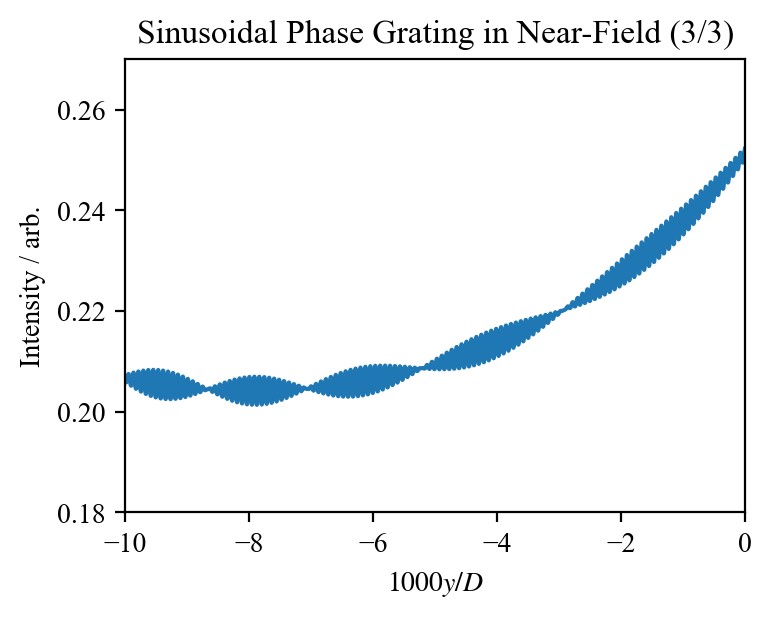

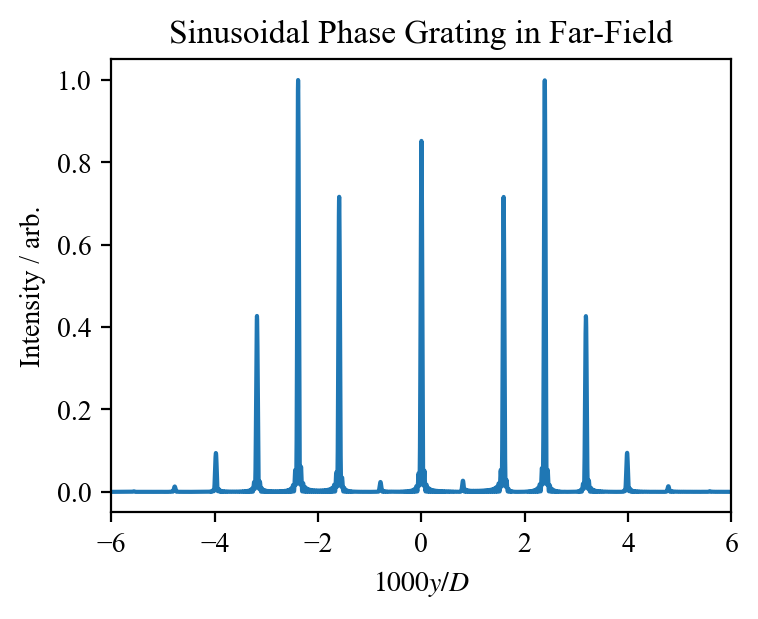

In [ ]:
# Calculate the diffraction pattern from a sinusoidal phase grating
# of period s and phase amplitude m
# d = 2mm, s = 100µm, m = 8 radians, \lambda = 500nm, D = 10m
# In our units d = 8000π, s = 400π.
steps = 500000
a_size = 100000*np.pi
aas = np.linspace(-a_size/2, a_size/2, steps)
aperture = np.exp(4j * np.sin(aas / 200)) * (np.abs(aas) < 4000*np.pi).astype(np.float)

diffractor = FFTDiffractor(aperture, a_size)
bs, psis = diffractor.calculate_far_field()

intensity = np.abs(psis)**2
intensity = intensity / np.max(intensity)

plt.figure(1, figsize=(4,3))
plt.plot(1000*bs, intensity, label='FFT Diffraction')
plt.xlabel('$1000y/D$')
plt.xlim([-6,6])
plt.ylabel('Intensity / arb.')
plt.title('Sinusoidal Phase Grating Fraunhofer Diffraction by FFT')

# Calculate the near-field diffraction pattern from a sinusoidal phase grating
# Use distances D = 0.5mm for near-field and D = 10m for far-field.
# In our units c = 2000π and c = 4π × 10^7

# Near field
bs2, psi2 = diffractor.calculate_near_field(2000*np.pi)
intensity2 = np.abs(psi2)**2
intensity2 = intensity2 / np.max(intensity2)

xlims = [[-500, 500], [-50, 50], [-10,0]]
ylims = [[-0.05, 1.05], [0.1-0.05, 0.95], [0.18, 0.27]]
for i in range(0,3):
    plt.figure(i+2, figsize=(4,3))
    plt.plot(1000*bs2, intensity2, label='FFT Diffraction')
    plt.xlabel('$1000y/D$')
    plt.xlim(xlims[i])
    plt.ylim(ylims[i])
    plt.ylabel('Intensity / arb.')
    plt.title('Sinusoidal Phase Grating in Near-Field (%d/3)' % (i+1))

# Far field
bs3, psi3 = diffractor.calculate_near_field(1e7*4*np.pi)
intensity3 = np.abs(psi3)**2
intensity3 = intensity3 / np.max(intensity3)

plt.figure(5, figsize=(4,3))
plt.plot(1000*bs3, intensity3, label='FFT Diffraction')
plt.xlabel('$1000y/D$')
plt.xlim([-6,6])
plt.ylabel('Intensity / arb.')
plt.title('Sinusoidal Phase Grating in Far-Field')

plt.show()

## Supplementary Task<br />Double-Slit and Triple-Slit Diffraction
We now plot the diffraction patterns a distance $D = 5\text{ mm}$ away from the screen for a double-slit and triple-slit with slit widths $100\text{ µm}$ and centre-to-centre spacing $200\text{ µm}$. In our units this corresponds to $a_{\text{slit width}} = 400\pi$ and $a_{\text{spacing}} = 800\pi$ and a distance $c = 20\, 000\pi$.

We note that the condition for Fraunhofer diffraction is
$$D \gg \frac{x_{\text{max}}^2}{\lambda}.$$
In our case we have $D = 5\text{ mm}$ and $\frac{x_{\text{max}}^2}{\lambda} \sim 150\text{ mm}$. Clearly we are in the near-field. The results seem like the screen is very close to the aperture, that is we basically see the shadow of the aperture on the screen with some blurring effects due to Fresnel diffraction.

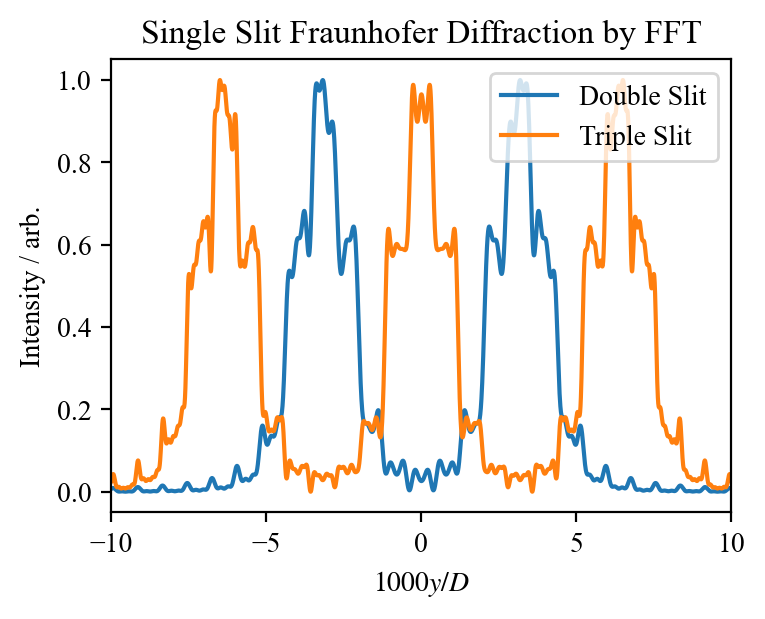

In [ ]:
steps = 25000
a_size = 50000*np.pi
aas = np.linspace(-a_size/2, a_size/2, steps)

aperture_dbslit = (np.all([np.abs(aas) <= 600*np.pi, np.abs(aas) >= 200*np.pi], axis=0)).astype(np.float)
diffractor_dbslit = FFTDiffractor(aperture_dbslit, a_size)
bs_db, psis_db = diffractor_dbslit.calculate_near_field(20000*np.pi)
intensity_db = np.abs(psis_db)**2
intensity_db = intensity_db / np.max(intensity_db)

aperture_tpslit = (np.any([np.all([np.abs(aas) <= 1000*np.pi, np.abs(aas) >= 600*np.pi], axis=0), np.abs(aas)<=200*np.pi], axis=0)).astype(np.float)
diffractor_tpslit = FFTDiffractor(aperture_tpslit, a_size)
bs_tp, psis_tp = diffractor_tpslit.calculate_near_field(20000*np.pi)
intensity_tp = np.abs(psis_tp)**2
intensity_tp = intensity_tp / np.max(intensity_tp)

plt.figure(1, figsize=(4,3))
plt.plot(1000*bs_db, intensity_db, label='Double Slit')
plt.plot(1000*bs_tp, intensity_tp, label='Triple Slit')
plt.xlabel('$1000y/D$')
plt.xlim([-10,10])
plt.ylabel('Intensity / arb.')
plt.title('Single Slit Fraunhofer Diffraction by FFT')
plt.legend()

plt.show()